# Best Streaming Service Analysis with Python

There is a lot of competition between all the major straming service like Netflix, Prime Video, Hulu, and Disney+. As a Data Scientist, it could be a very amazing task for you to find which is the best streaming service among them. In this article, I'm going to introduce you to a data sciencie project on the best streaming service analysis with Python

Original project Aman Kharwal

For analyzing which is the best streaming service, I will be using the rating of shows on all the major plarforms like Netflix, Prime Video, Hulu, and Disney+

The dataset that I will use for the task of Best Streaming service analysis contains a comprehensive list of all the TV shows which are available on the 4 platforms that we are comparing in this task

Different use for this dataset:
1. Analyzing the streaming platforms
2. Analyzing the IMBD and Rotten Tomatoes rating of all the shows
3. Analyzing the target age group of most of the TV shows

In [35]:
import numpy as np
import pandas as pd

import plotly
import plotly as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

tv_shows = pd.read_csv("tv_shows.csv")
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,94.0,100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,87.0,96,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,90.0,95,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,88.0,94,1,0,0,0,1
4,4,5,Dark,2017,16+,88.0,93,1,0,0,0,1


As we are only analizyng the data so we don't need to use machine learning algorithms here. Most of the work can be done by visualizing and analyzing the ratings of shows on the streaming platforms

## Data preparation

Let's prepare the dataset so that we can easily analyze tha data. We will start preparing the data by dropping the duplicate values based on the title of the shows

In [36]:
tv_shows.drop_duplicates(subset='Title',
                         keep='first', inplace=True)

Now, in the code section below, I will fill the null values in the data with zeroes and then convert them into integer data types. For this task I use Data Wrangler

Visualizing the data will be easies if we get 1s and 0s in the columns named Netflix, Hulu, Disney and Prime Video under a categorical format. There may be a chance that the same show is available in more than one platform

In [37]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

Now, I will merge this data with the data we started with but I will drop some unwanted columns

In [38]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')
tv_shows_combined.drop(columns=['Unnamed: 0', 'Netflix',
                                'Hulu', 'Prime Video', 'Disney+'], inplace=True)

<Axes: xlabel='StreamingOn'>

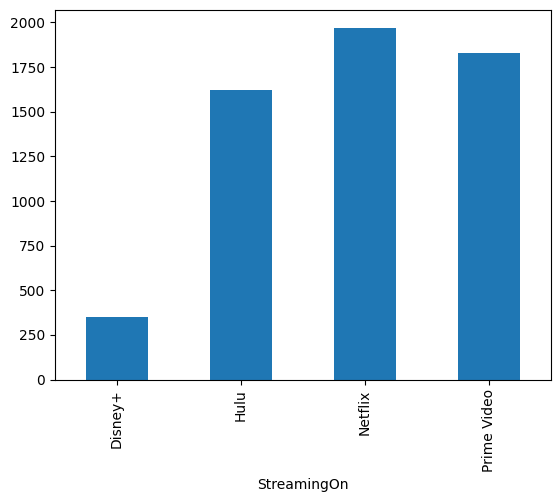

In [39]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb> 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

## Final Step: Finding Best Streaming Service

Now let's visualize the data to find the best streaming service based on their rating. I will first use the violin charts to gauge the content rating and the freshness of the streaming platform:

In [44]:
import plotly.express as px

figure = []
figure.append(px.violin(tv_shows_both_ratings, x= 'StreamingOn', y='IMDb', points='all', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x= 'StreamingOn', y='Rotten Tomatoes', points='all', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)
        
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

Now let's use a scatter plot to compare the rating between IMBD and Rotten Tomatoes to compare which streaming platform has the best ratings in both the user rating platforms

In [42]:
px.scatter(tv_shows_both_ratings, x='IMDb',
          y='Rotten Tomatoes', color='StreamingOn')

## Conclusion

By using the violin chart we can observe that

1. Hulu, Netflix, and Amazon Videos all have important data. As content increases, quality decreases for all three
2. Prime Videos has become denser in the top half when looking at IMDB and performs well in cool
3. Disney+ being new, has also been very successful in this area

Using the scatter plot we can observe that it is quite obvious that Amazon Prime performs very well in the fourth quadrant. Even by using the bar plot, we can observe that Amazon prime had a great quantity of content. So looking at all the streaming platforms we can conclude that Amazon Prime is better in both quality and quantity
